# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [9]:
data_train = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

data_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
data_test = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

data_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [11]:
data = pd.concat([data_train,data_test])
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# **Converting the Categorical Data**

**1.Binary Encoding**

In [12]:
data['gender'] = data_train['gender'].map({'M': 0, 'F': 1})

**2.Label Encoding**

In [13]:
categorical_cols= [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype == 'category']

print(categorical_cols)

['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num']


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [16]:
categorical_cols_1 = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype == 'category']

print(categorical_cols_1)

[]


In [17]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2703186189652095,514,8,4.97,164,18,1,576,...,36.0788,-81.1781,3495,372,791,80326,1325376018,36.011293,-82.048315,0
1,1,1,630423337322,241,4,107.23,312,161,1,439,...,48.8878,-118.2105,149,431,619,227462,1325376044,49.159047,-118.186462,0
2,2,2,38859492057661,390,0,220.11,116,386,0,610,...,42.1808,-112.2620,4154,308,309,1169030,1325376051,43.150704,-112.154481,0
3,3,3,3534093764340240,360,2,45.00,165,468,0,945,...,46.2306,-112.1138,1939,330,405,777909,1325376076,47.034331,-112.561071,0
4,4,4,375534208663984,297,9,41.96,339,153,0,422,...,38.4207,-79.4629,99,116,746,1186866,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,1819546,30560609640617,507,5,43.77,245,323,1,573,...,40.4931,-91.8912,519,477,386,1122239,1388534347,39.946837,-91.333331,0
555715,555715,1819547,3556613125071656,264,7,111.84,180,438,1,583,...,29.0393,-95.4401,28739,207,961,235369,1388534349,29.661049,-96.186633,0
555716,555716,1819548,6011724471098086,496,7,86.88,19,243,1,138,...,46.1966,-118.9017,3684,307,669,783898,1388534355,46.658340,-119.715054,0
555717,555717,1819549,4079773899158,75,13,7.99,120,351,0,711,...,44.6255,-116.4493,129,63,383,145946,1388534364,44.470525,-117.080888,0


In [18]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# **Data Preprocessing using SMOTE**

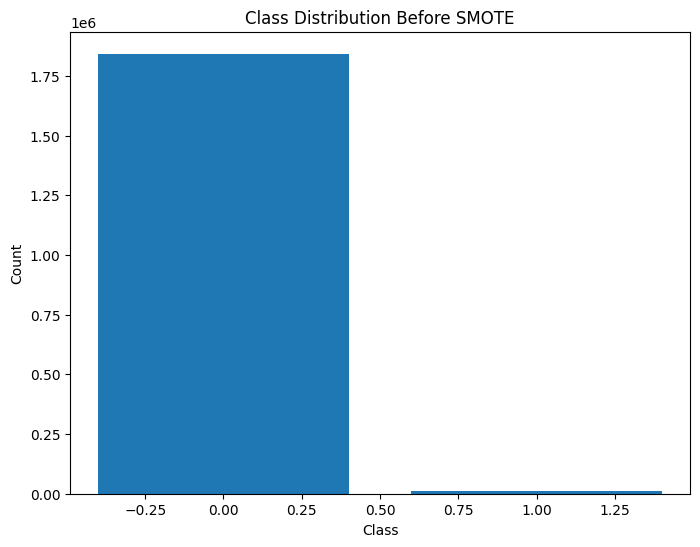

In [20]:
import matplotlib.pyplot as plt

# Before SMOTE
plt.figure(figsize=(8, 6))
plt.bar(data['is_fraud'].value_counts().index, data['is_fraud'].value_counts())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before SMOTE')
plt.show()

from imblearn.over_sampling import SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
data_balanced, target_balanced = smote.fit_resample(data, data['is_fraud'])

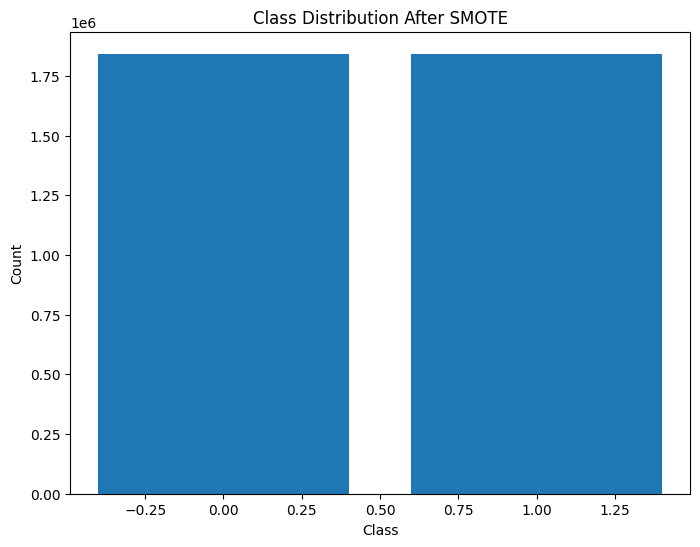

In [22]:
# After SMOTE
plt.figure(figsize=(8, 6))
plt.bar(target_balanced.value_counts().index, target_balanced.value_counts())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.show()

In [23]:
X=data_balanced.drop(['is_fraud'],axis='columns')
y=data_balanced.is_fraud
state = np.random.RandomState(42)
df=pd.DataFrame(data_balanced)

In [24]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2703186189652095,514,8,4.970000,164,18,1,576,...,36.0788,-81.1781,3495,372,791,80326,1325376018,36.011293,-82.048315,0
1,1,1,630423337322,241,4,107.230000,312,161,1,439,...,48.8878,-118.2105,149,431,619,227462,1325376044,49.159047,-118.186462,0
2,2,2,38859492057661,390,0,220.110000,116,386,0,610,...,42.1808,-112.2620,4154,308,309,1169030,1325376051,43.150704,-112.154481,0
3,3,3,3534093764340240,360,2,45.000000,165,468,0,945,...,46.2306,-112.1138,1939,330,405,777909,1325376076,47.034331,-112.561071,0
4,4,4,375534208663984,297,9,41.960000,339,153,0,422,...,38.4207,-79.4629,99,116,746,1186866,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685481,427637,421138,4481172224716138496,332,2,11.580000,164,221,1,385,...,34.8511,-80.0025,2801,391,296,345468,1341968751,35.001071,-80.428631,1
3685482,41072,1315094,4989847570577635328,118,4,69.268776,341,7,0,213,...,34.1832,-81.5324,8333,30,893,979939,1373042062,34.285310,-80.872864,1
3685483,171964,1443638,375974680629816,448,6,34.681628,285,275,0,946,...,41.6611,-73.0449,2376,225,531,1671788,1377007716,41.504596,-73.610217,1
3685484,73387,72523,3520550088202337,157,7,355.792717,246,453,0,152,...,47.8342,-90.0476,272,203,971,720157,1329058179,47.777945,-89.674059,1


# **Using Data Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# **Using Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression

# Build basic Logistic Regression model
log_reg_Model = LogisticRegression()
log_reg_Model.fit(X_train, y_train)

LogisticRegression()

In [27]:
print(f'Train Accuracy - :{log_reg_Model.score(X_train,y_train):.3f}')
print(f'Test Accuracy - :{log_reg_Model.score(X_test,y_test):.3f}' )

Train Accuracy - :0.500
Test Accuracy - :0.500


# **Using Decision Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [31]:

# Predict on the training data
y_train_pred = dt_model.predict(X_train)

# Predict on the test data
y_test_pred = dt_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.3f}")

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

Training Accuracy: 1.000
Test Accuracy: 0.986
